<html> <h1 style="font-style:bold; color:blue;"> Neural Computing and Deep Learning </h1> </html>

<html> <h1 style="font-style:italic; color:blue;"> Week-2 </h1> </html>

<html> <h2 style="font-style:italic; color:blue;"> MLP for Binary Classification </h2> </html>

In this lab, you will use the Ionosphere data binary (two-class) classification dataset to demonstrate an MLP for binary classification.

This dataset involves predicting whether a structure is in the atmosphere or not given radar returns.

The dataset will be downloaded automatically using Pandas, but you can learn more in the links below.

[Ionosphere Dataset (csv)](https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv)

[Ionosphere Dataset Description (csv)](https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.names)


Your task for this is lab is to develop a Keras-based Multi-Layer Perceptron model for this data set. Remember the number of output layers is equal to the number of classes.

Following we have provided some piece of code to you while you need to complete the rest of the code on your own.




<html> <h3 style="font-style:bold; color:blue;"> Here and in future practice sessions, if you see the following expression  </h3> </html>

#Your code to ......

#....

#....

<html> <h3 style="font-style:bold; color:blue;"> 
    you must write your code to solve the problem in this cell. 
    
Usually, the requirement will have a link where you can find information and examples of the solution, or you must take similar code from previous weeks' Jupyter Notebooks.  

As usual, you can compare your result with the result in the next (control) cell.
</h3> </html>


In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
# Your code to import read_csv class from pandas:

from pandas import read_csv


# Your code to import train_test_split class from sklearn: 
# Follow link https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split

__________________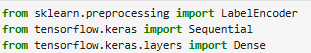

In [3]:
!pip install tensorflow

In [5]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

### Read the dataset from the path below. Store the data in a pandas dataframe named 'df'

Link to API - https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html

<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

In [7]:
path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv'

___________________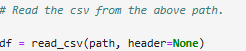

In [10]:
df = pd.read_csv(path, header = None)

See the sample dataset. Print few rows of the dataset. Use dataframe.head() method.

Have a look at:  https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html

In [12]:
# Your code to print first few rows of the dataset:

print(df.head(5))

   0   1        2        3        4        5        6        7        8   \
0   1   0  0.99539 -0.05889  0.85243  0.02306  0.83398 -0.37708  1.00000   
1   1   0  1.00000 -0.18829  0.93035 -0.36156 -0.10868 -0.93597  1.00000   
2   1   0  1.00000 -0.03365  1.00000  0.00485  1.00000 -0.12062  0.88965   
3   1   0  1.00000 -0.45161  1.00000  1.00000  0.71216 -1.00000  0.00000   
4   1   0  1.00000 -0.02401  0.94140  0.06531  0.92106 -0.23255  0.77152   

        9   ...       25       26       27       28       29       30  \
0  0.03760  ... -0.51171  0.41078 -0.46168  0.21266 -0.34090  0.42267   
1 -0.04549  ... -0.26569 -0.20468 -0.18401 -0.19040 -0.11593 -0.16626   
2  0.01198  ... -0.40220  0.58984 -0.22145  0.43100 -0.17365  0.60436   
3  0.00000  ...  0.90695  0.51613  1.00000  1.00000 -0.20099  0.25682   
4 -0.16399  ... -0.65158  0.13290 -0.53206  0.02431 -0.62197 -0.05707   

        31       32       33  34  
0 -0.54487  0.18641 -0.45300   g  
1 -0.06288 -0.13738 -0.02447   b  

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


Print the basic info of the dataset. Use 

dataframe.info() 

from pandas library


In [14]:
# Your code to print information about the dataframe:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       351 non-null    int64  
 1   1       351 non-null    int64  
 2   2       351 non-null    float64
 3   3       351 non-null    float64
 4   4       351 non-null    float64
 5   5       351 non-null    float64
 6   6       351 non-null    float64
 7   7       351 non-null    float64
 8   8       351 non-null    float64
 9   9       351 non-null    float64
 10  10      351 non-null    float64
 11  11      351 non-null    float64
 12  12      351 non-null    float64
 13  13      351 non-null    float64
 14  14      351 non-null    float64
 15  15      351 non-null    float64
 16  16      351 non-null    float64
 17  17      351 non-null    float64
 18  18      351 non-null    float64
 19  19      351 non-null    float64
 20  20      351 non-null    float64
 21  21      351 non-null    float64
 22  22

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 351 entries, 0 to 350
Data columns (total 35 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       351 non-null    int64  
 1   1       351 non-null    int64  
 2   2       351 non-null    float64
 3   3       351 non-null    float64
 4   4       351 non-null    float64
 5   5       351 non-null    float64
 6   6       351 non-null    float64
 7   7       351 non-null    float64
 8   8       351 non-null    float64
 9   9       351 non-null    float64
 10  10      351 non-null    float64
 11  11      351 non-null    float64
 12  12      351 non-null    float64
 13  13      351 non-null    float64
 14  14      351 non-null    float64
 15  15      351 non-null    float64
 16  16      351 non-null    float64
 17  17      351 non-null    float64
 18  18      351 non-null    float64
 19  19      351 non-null    float64
 20  20      351 non-null    float64
 21  21      351 non-null    float64
 22  22

Print the shape of the dataframe.Use 

dataframe.shape 

method.

In [16]:
# Your code to print the shape of the dataset:

print(df.shape)

(351, 35)


(351, 35)

### Separate the input and output from the dataframe. Input is all columns besides last column. Output is the last column.


______________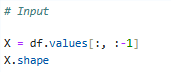

In [18]:
X = df.values[:,:-1]
X.shape

(351, 34)

(351, 34)

In [20]:
# Your code to get y  
# Hint y = df.values[:, some parameters]

y = df.values[:,:-34]

# Your code to print 'y' shape:

# ...
y.shape

(351, 1)

(351,)

___________________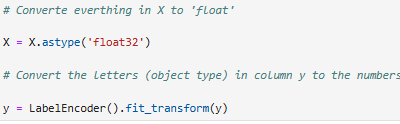

In [22]:
X = X.astype('float32')
y=LabelEncoder().fit_transform(y)

C:\Users\LOHIDAS\anaconda3\anacon\ana\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


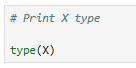

In [24]:
type(X)

numpy.ndarray

In [24]:
type(X)

numpy.ndarray

In [26]:
#LabelEncoder?
# Encode target labels with value between 0 and n_classes-1.
# This transformer should be used to encode target values, 
# *i.e.* `y`, and not the input `X`.

In [30]:
#LabelEncoder.fit_transform?

In [28]:
# Print the genral information of the X and y 

# Your code to print X:

print(X)

# Your code to print y:

print(y)

# your code to print shape of X. Remember X is a numpy array

print(X.shape)

# your code to print shape of y. Remember y is a numpy array

print(y.shape)


[[ 1.       0.       0.99539 ... -0.54487  0.18641 -0.453  ]
 [ 1.       0.       1.      ... -0.06288 -0.13738 -0.02447]
 [ 1.       0.       1.      ... -0.2418   0.56045 -0.38238]
 ...
 [ 1.       0.       0.94701 ...  0.00442  0.92697 -0.00577]
 [ 1.       0.       0.90608 ... -0.03757  0.87403 -0.16243]
 [ 1.       0.       0.8471  ... -0.06678  0.85764 -0.06151]]
[1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1
 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1

[[ 1.       0.       0.99539 ... -0.54487  0.18641 -0.453  ]
 [ 1.       0.       1.      ... -0.06288 -0.13738 -0.02447]
 [ 1.       0.       1.      ... -0.2418   0.56045 -0.38238]
 ...
 [ 1.       0.       0.94701 ...  0.00442  0.92697 -0.00577]
 [ 1.       0.       0.90608 ... -0.03757  0.87403 -0.16243]
 [ 1.       0.       0.8471  ... -0.06678  0.85764 -0.06151]]
[1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1

#### Separate X and y into training and test set with a ratio of your choice. 

Use sklearn train_test_split class.

Have a look at:  
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [47]:
#train_test_split?

In [30]:
# Your code to separate the data into trauning and test set:
from sklearn.model_selection import train_test_split

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Print the shapes of the resulting arrays:

# Your code to print shape of X_train
# Your code to print shape of X_test
# Your code to print shape of y_train
# Your code to print shape of X_test

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (280, 34) (280,)
Testing set shape: (71, 34) (71,)


(235, 34) (116, 34) (235,) (116,)


_____________________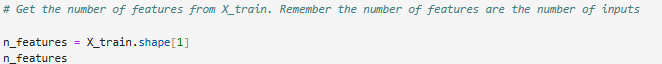

In [34]:
n_features = X_train.shape[1]
n_features

34

34

<html> <h2 style="font-style:bold; color:blue;"> Creating a Multi-layer Perceptron using Keras </h2> </html>

We have added first and last layers. Create the hidden layers of your choise.
You can chose any number of hidden layers and activation function of your chose
https://keras.io/api/layers/core_layers/dense/

In [40]:
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(n_features,)))

# Your code to add as many layers with activation functions of your choice:


# Additional hidden layers
model.add(Dense(8, activation='relu'))

# Output layer (binary classification)
model.add(Dense(1, activation='sigmoid'))

_________________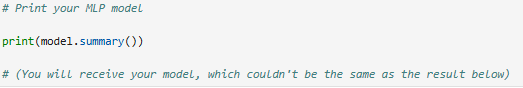

In [42]:
print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 10)                  │             350 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 8)                   │              88 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 447 (1.75 KB)

 Trainable params: 447 (1.75 KB)

 Non-trainable params: 0 (0.00 B)

None


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           350 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 447 (1.75 KB)

 Trainable params: 447 (1.75 KB)

 Non-trainable params: 0 (0.00 B)

None


<html> <h3 style="font-style:italic; color:blue;"> MLP training </h3> </html>

In the next cell, we trained the above neural network model and tested its accuracy. 

___________________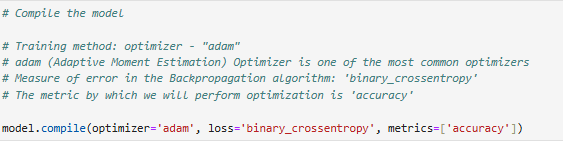

In [44]:
model.compile(optimizer = 'adam',loss ='binary_crossentropy',metrics = ['accuracy'])

_____________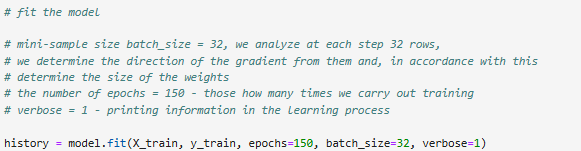

In [46]:
history = model.fit(X_train , y_train , epochs = 20 , batch_size = 32, verbose =1)

Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.3864 - loss: 0.7785
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5207 - loss: 0.7003 
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6711 - loss: 0.6461
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7725 - loss: 0.5807
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7876 - loss: 0.5515
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8338 - loss: 0.5083
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8790 - loss: 0.4556
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9104 - loss: 0.4150
Epoch 9/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8896 - loss: 0.4119
Epoch 10/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9222 - loss: 0.3574
Epoch 11/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9277 - loss: 0.3238
Epoch 12/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9318 - loss: 0.3132


Epoch 1/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.3299 - loss: 0.7063
Epoch 2/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.4034 - loss: 0.6804
Epoch 3/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7371 - loss: 0.6652
Epoch 4/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8110 - loss: 0.6572
Epoch 5/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8814 - loss: 0.6369
Epoch 6/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8598 - loss: 0.6267
Epoch 7/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8648 - loss: 0.6188
Epoch 8/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8447 - loss: 0.6050
Epoch 9/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8191 - loss: 0.6018
Epoch 10/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8407 - loss: 0.5812
Epoch 11/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8468 - loss: 0.5665
Epoch 12/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8607 - loss: 0.541

__________________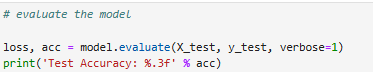

In [48]:
loss, acc= model.evaluate(X_test, y_test,verbose=1)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.8773 - loss: 0.3370 


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9380 - loss: 0.1838
Test Accuracy: 0.931


___________________________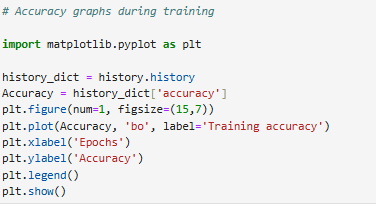

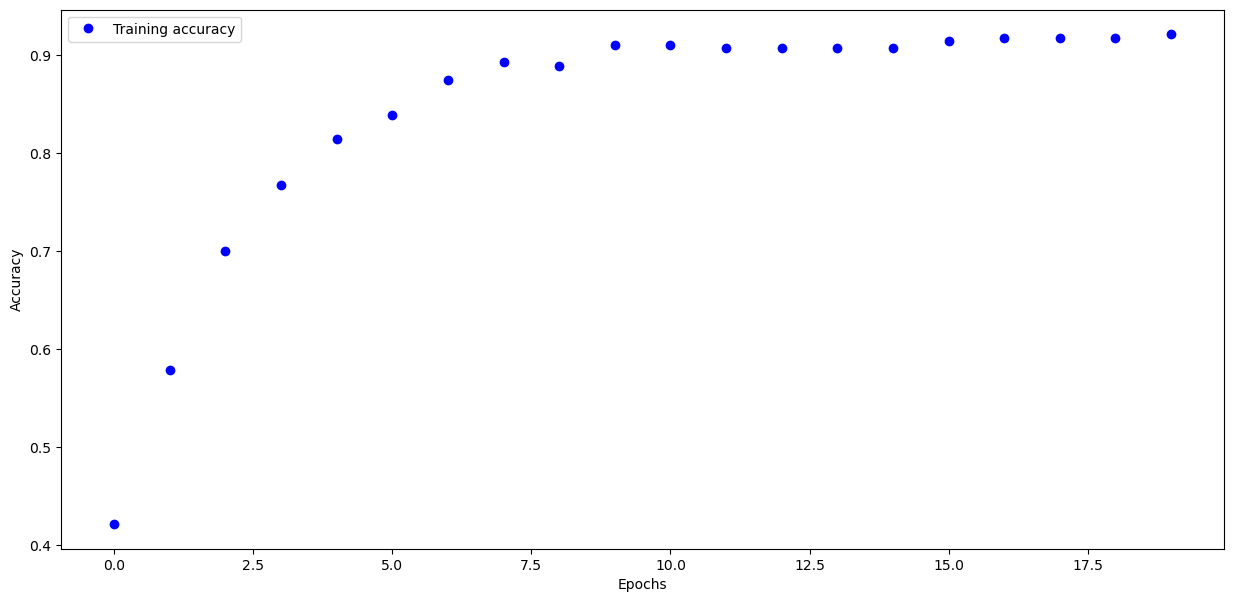

In [50]:
# Accuracy graphs during training

import matplotlib.pyplot as plt

history_dict = history.history
Accuracy = history_dict['accuracy']
plt.figure(num=1, figsize=(15,7))
plt.plot(Accuracy, 'bo', label='Training accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

** How much accuracy have you got? Compare the accuracy with your peers. **

** Now, change your model (add layers and cells in the cells below) and activation function to get the better accuracy as compared to your peers **

In [129]:
# ...
# ...

In [52]:
from tensorflow.keras.layers import Dropout, BatchNormalization

# Define the model
model = Sequential()

# Input layer
model.add(Dense(32, activation='relu', input_shape=(n_features,)))
model.add(BatchNormalization())

# Hidden layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))

# Output layer (binary classification)
model.add(Dense(1, activation='sigmoid'))

In [54]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 32)                  │           1,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,473 (21.38 KB)

 Trainable params: 5,409 (21.13 KB)

 Non-trainable params: 64 (256.00 B)

In [56]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [58]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 62ms/step - accuracy: 0.3247 - loss: 0.8149 - val_accuracy: 0.8451 - val_loss: 0.6446
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7342 - loss: 0.6389 - val_accuracy: 0.9014 - val_loss: 0.5601
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8485 - loss: 0.4850 - val_accuracy: 0.9014 - val_loss: 0.5038
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8860 - loss: 0.4119 - val_accuracy: 0.9014 - val_loss: 0.4569
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8678 - loss: 0.4265 - val_accuracy: 0.9014 - val_loss: 0.4204
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8833 - loss: 0.3385 - val_accuracy: 0.9014 - val_loss: 0.3878
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8840 - loss: 0.3339 - val_accuracy: 0.9014 - val_loss: 0.3584
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.9246 - loss: 0.2272 - val_accuracy: 0.9014 - val_loss: 0.3326


In [60]:
# After training the model, you can print the metrics (accuracy, loss)
print("Training accuracy:", history.history['accuracy'][-1])
print("Validation accuracy:", history.history['val_accuracy'][-1])

print("Training loss:", history.history['loss'][-1])
print("Validation loss:", history.history['val_loss'][-1])

Training accuracy: 1.0
Validation accuracy: 0.9718309640884399
Training loss: 0.008050414733588696
Validation loss: 0.14080892503261566


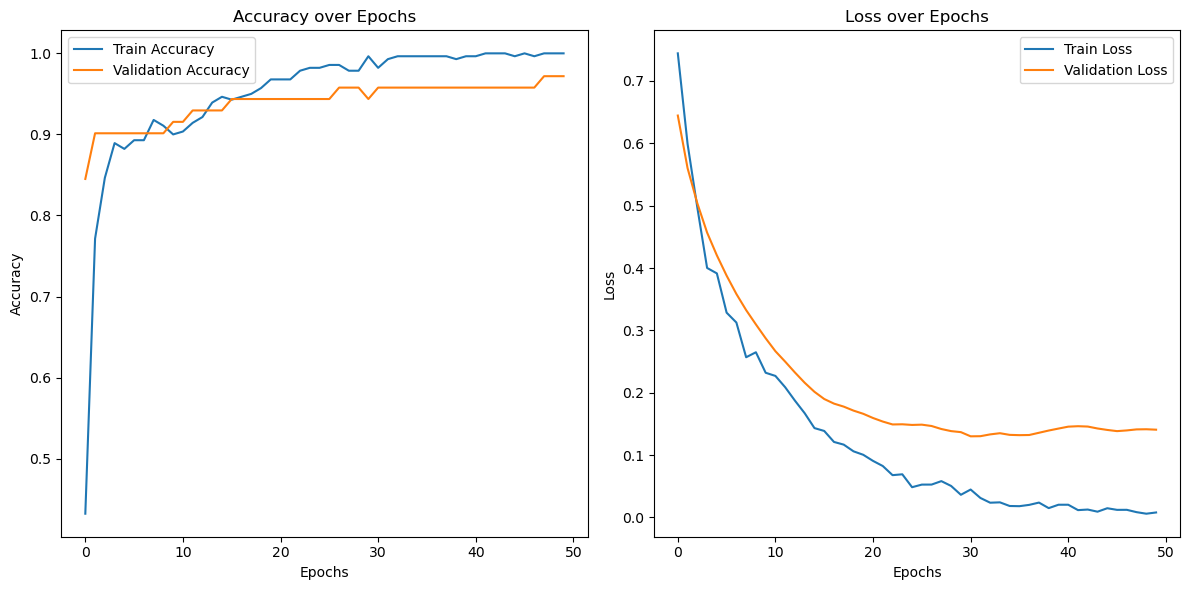

In [62]:
# Plot training & validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


<html> <h2 style="font-style:bold; color:red;"> Lab Logbook requirements </h2> </html>

### **Important:** Document in your lab logbook the accuracy of the improved model. Do not include any code or explanations in your lab logbook. 

1. Simply record the accuracy. For example, if the obtained accuracy is 0.98, then enter "0.98" in your lab logbook.

2. Copy your MLP architectures' screenshots to Logbook.


<html> <h2 style="font-style:bold; color:blue;"> Try out the same model with Keras Functional models! </h2> </html>
(Advanced part)

Refer to [Keras](https://keras.io/) for more details and tutorials for the same.

### Define the layers & create the model object and input & output!

### https://keras.io/guides/functional_api/

#### The Keras Functional API is a way to create complex models, such as those with multiple outputs, models with shared layers, or acyclic graphs.

#### An example of a model with multiple inputs and multiple outputs:

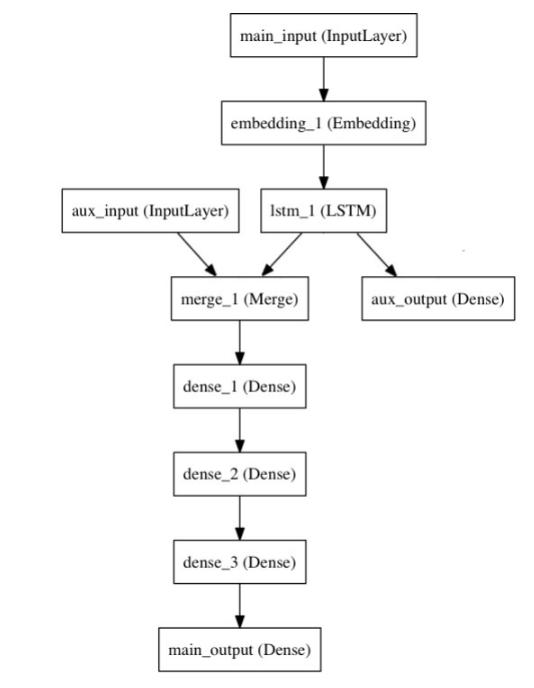

In [64]:
#  Your code of 
# Keras Functional model

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization

# Input layer
inputs = Input(shape=(n_features,))

# Hidden layers
x = Dense(32, activation='relu')(inputs)
x = BatchNormalization()(x)

x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)

x = Dense(32, activation='relu')(x)
x = Dropout(0.3)(x)

# Output layer
outputs = Dense(1, activation='sigmoid')(x)

In [66]:
# Define the model
model = Model(inputs=inputs, outputs=outputs)

In [68]:
model.summary()

Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 34)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 32)                  │           1,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,473 (21.38 KB)

 Trainable params: 5,409 (21.13 KB)

 Non-trainable params: 64 (256.00 B)

In [70]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [72]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 23s 240ms/step - accuracy: 0.4562 - loss: 0.8317 - val_accuracy: 0.7324 - val_loss: 0.6481
Epoch 2/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.8450 - loss: 0.5237 - val_accuracy: 0.9014 - val_loss: 0.5257
Epoch 3/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step - accuracy: 0.9006 - loss: 0.4582 - val_accuracy: 0.9014 - val_loss: 0.4495
Epoch 4/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.8732 - loss: 0.4374 - val_accuracy: 0.9014 - val_loss: 0.4054
Epoch 5/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8657 - loss: 0.3693 - val_accuracy: 0.9014 - val_loss: 0.3825
Epoch 6/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.8935 - loss: 0.3055 - val_accuracy: 0.9014 - val_loss: 0.3673
Epoch 7/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.8918 - loss: 0.3249 - val_accuracy: 0.9014 - val_loss: 0.3579
Epoch 8/50
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9261 - loss: 0.2542 - val_accuracy: 0.9014 - val_loss: 0.344

In [74]:
# Print the final training and validation accuracy and loss
print("Training accuracy:", history.history['accuracy'][-1])
print("Validation accuracy:", history.history['val_accuracy'][-1])

print("Training loss:", history.history['loss'][-1])
print("Validation loss:", history.history['val_loss'][-1])

Training accuracy: 1.0
Validation accuracy: 0.9295774698257446
Training loss: 0.005684575531631708
Validation loss: 0.2718985676765442
